In [1]:
#202331147_Nabila
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [2]:
#202331147_Nabila
img = cv2.imread('3.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
#202331147_Nabila
def get_image_size(img_rgb, format='JPEG', quality=95):
    buffer = BytesIO()
    pil_img = Image.fromarray(img_rgb)
    pil_img.save(buffer, format=format, quality=quality)
    size_kb = len(buffer.getvalue()) / 1024  # dalam KB
    return size_kb, buffer

In [5]:
#202331147_Nabila
original = img_rgb.copy()
original_size, _ = get_image_size(original)

In [6]:
#202331147_Nabila
compressed_buffer = BytesIO()
Image.fromarray(original).save(compressed_buffer, format='JPEG', quality=10)
compressed_buffer.seek(0)
compressed_img = Image.open(compressed_buffer)
compressed_rgb = np.array(compressed_img)
compressed_size = len(compressed_buffer.getvalue()) / 1024  

In [7]:
#202331147_Nabila
def quantize_image(image, levels=4):
    factor = 256 // levels
    quantized = (image // factor) * factor + factor // 2
    return quantized.astype(np.uint8)

quantized = quantize_image(original, levels=4)
quantized_size, _ = get_image_size(quantized)

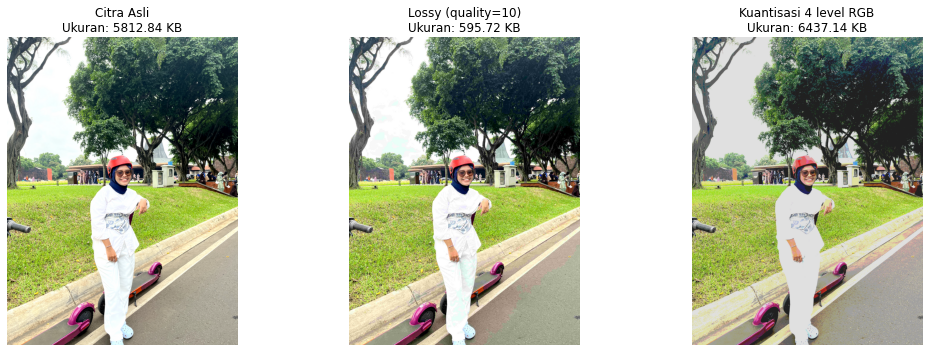

In [8]:
#202331147_Nabila
titles = [
    f'Citra Asli\nUkuran: {original_size:.2f} KB',
    f'Lossy (quality=10)\nUkuran: {compressed_size:.2f} KB',
    f'Kuantisasi 4 level RGB\nUkuran: {quantized_size:.2f} KB'
]
images = [original, compressed_rgb, quantized]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()